# LAB 4
## Name: Simhadri Tanya
## Reg No: BL.EN.U4AIE21119

In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

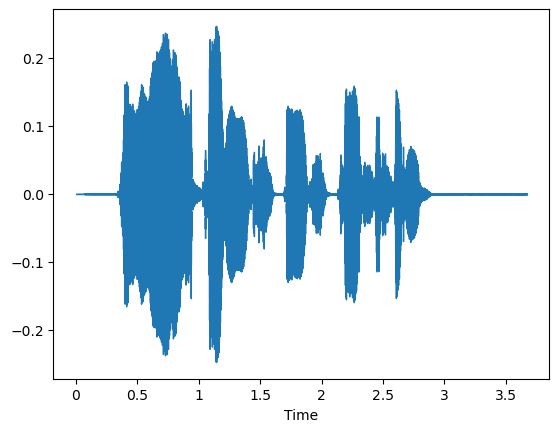

In [2]:
y, sr = librosa.load("C:\\Users\\Tanya Simhadri\\Downloads\\AI_in_Speech_Processing_recording.mpeg")
librosa.display.waveshow(y)

## 1 

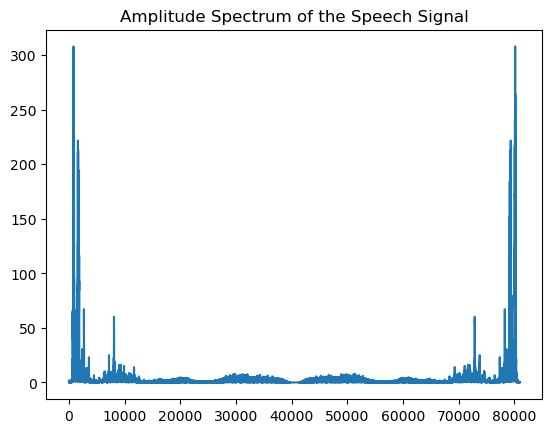

In [11]:
fft_y = np.fft.fft(y, n=None, axis=-1, norm=None)
amplitude = np.abs(fft_y)

# Plot the amplitude spectrum
plt.plot(amplitude)
plt.title("Amplitude Spectrum of the Speech Signal")
plt.show()

## 2 

[-3.46944695e-17-8.67361738e-18j -3.46944022e-17-1.73606963e-18j
 -8.61542457e-21+5.55111506e-17j ... -1.92304637e-04-2.38120549e-17j
 -2.08821220e-04+1.76923742e-17j -1.47505663e-04+5.22348708e-17j]


C:\Users\Tanya Simhadri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


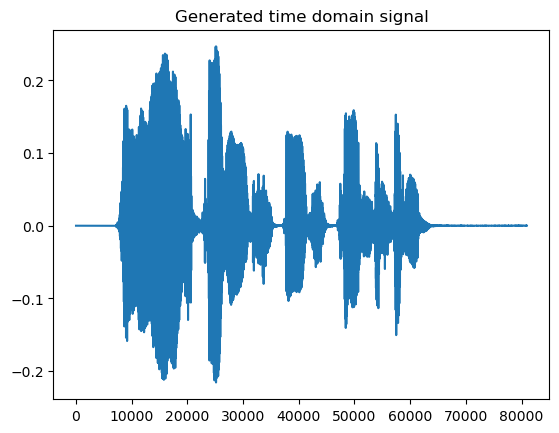

In [14]:
ifft_y = np.fft.ifft(fft_y, n=None, axis=-1, norm=None)
print(ifft_y)
# Plot the amplitude spectrum
plt.plot(ifft_y)
plt.title("Generated time domain signal")
plt.show()

## 3 

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Detect the silent intervals using librosa.effects.split()
intervals = librosa.effects.split(y, top_db = 20)
print(intervals)

# Create a list of segmented speech using the detected intervals
speech_segments = [y[start:end] for start, end in intervals]

[[ 7680 22016]
 [23040 34816]
 [36864 44544]
 [47104 62464]]


In [18]:
from IPython.display import Audio, display
audio_segment = Audio(speech_segments[0], rate=sr)
display(audio_segment)

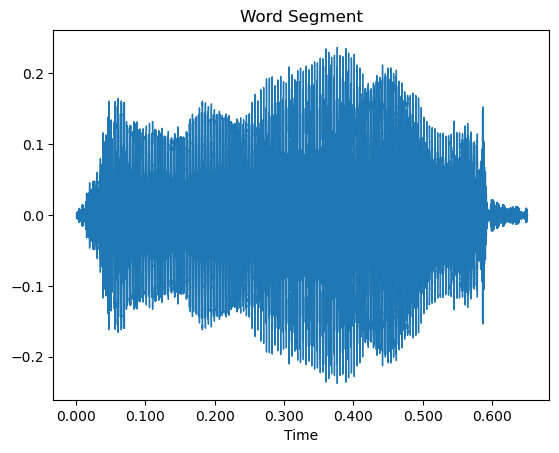

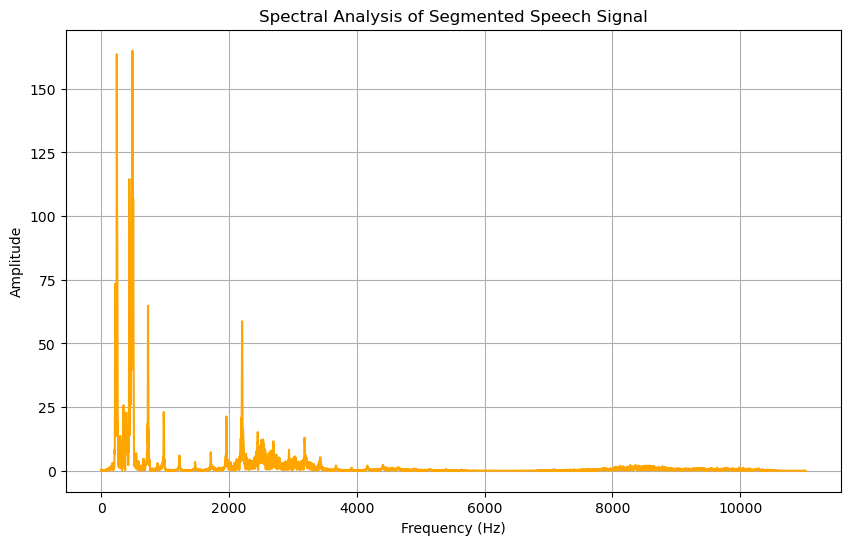

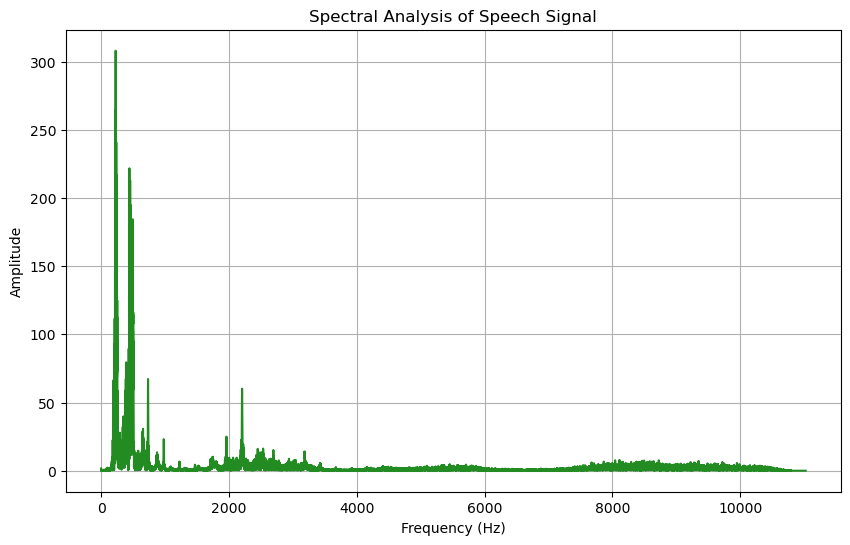

In [36]:
librosa.display.waveshow(speech_segments[0], sr=sr)
plt.title('Word Segment')

# Play the audio of the word segment
ipd.Audio(speech_segments[0], rate=sr)

fft_output_seg = np.fft.fft(speech_segments[0])
seg_freq = np.fft.fftfreq(len(speech_segments[0]), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(seg_freq[:len(seg_freq)//2], np.abs(fft_output_seg)[:len(seg_freq)//2],color='orange')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Segmented Speech Signal')
plt.grid(True)
plt.show()
fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='forestgreen')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()

## 4 

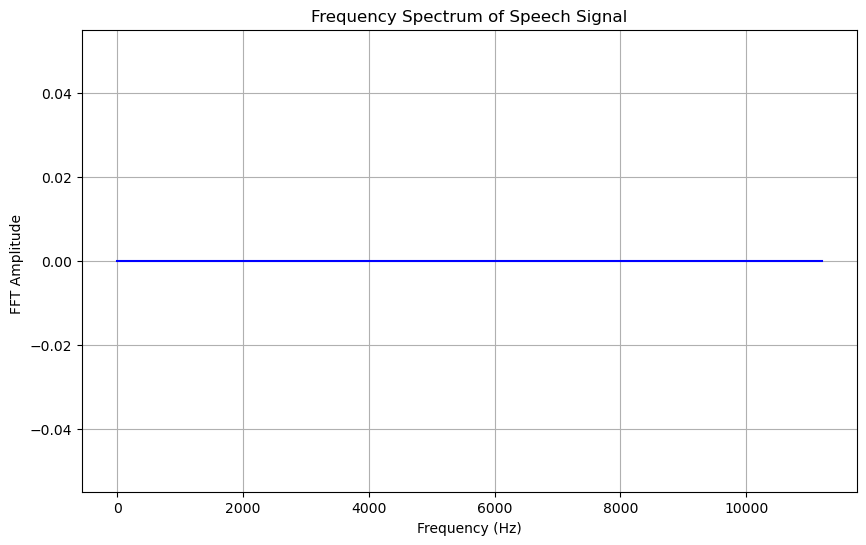

In [37]:
import numpy as np
from scipy.fft import fft
sr4=22500
w_duration = 0.02
w_samples = int(w_duration * sr4)
w_signal = y[:w_samples]

# Compute the FFT
X = fft(w_signal)

# Get the one-sided spectrum
n_oneside = w_samples // 2
frequencies = np.arange(n_oneside) * (sr4 / w_samples)
spectrum = np.abs(X[:n_oneside])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude ')
plt.title('Frequency Spectrum of Speech Signal')
plt.grid(True)
plt.show()

## 5 

In [31]:
# Window length in samples (20 ms)
window_length = int(0.02 * sr)

# Hop length (50% overlap for smoother transitions)
hop_length = window_length // 2

# Compute STFT
stft = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
print(stft)

[[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -4.2760111e-03+0.0000000e+00j
  -1.6856047e-03+0.0000000e+00j -2.2753931e-03+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  2.5750924e-04-1.6587260e-03j
  -1.0031755e-03+8.4386049e-03j  2.9396536e-03+7.6316699e-04j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  1.3001619e-03-2.1561196e-03j
   2.2054075e-03-9.9809160e-03j  3.0321369e-06-2.0088418e-03j]
 ...
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -1.0796858e-07-1.1543873e-07j
   1.9239485e-07-1.5190086e-07j -6.8544864e-06+7.9380543e-06j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  4.7715531e-08+5.9408638e-09j
  -3.3269743e-08-2.1515332e-08j  4.1992935e-06-9.0221110e-06j]
 [ 0.0000000e+00+0.0000000e+00j  0.00000

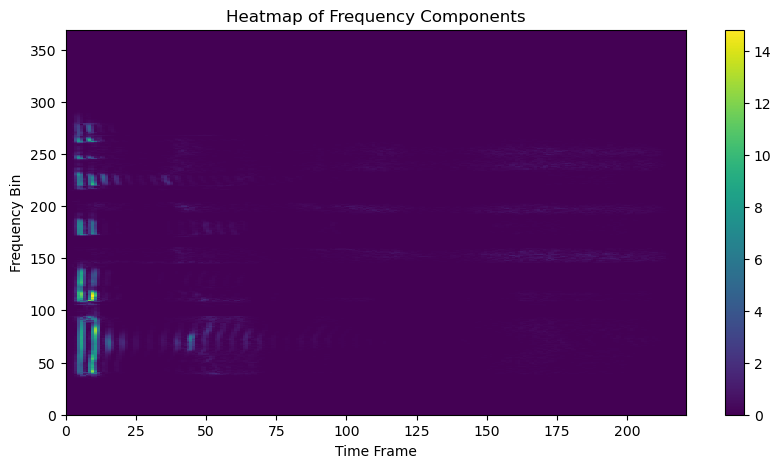

In [32]:
# Get magnitude of STFT (representing frequency component amplitudes)
amplitude = np.abs(stft)

# Stack frequency components as columns in a matrix
frequency_matrix = np.transpose(amplitude)

# Create a heatmap plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(frequency_matrix, vmin=0, vmax=np.max(amplitude))
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.title("Heatmap of Frequency Components")
plt.colorbar()
plt.show()

## 6 

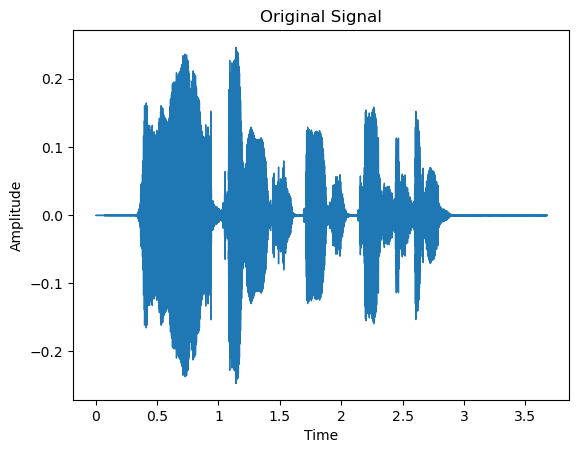

C:\Users\Tanya Simhadri\AppData\Local\Temp\ipykernel_22244\3594957050.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


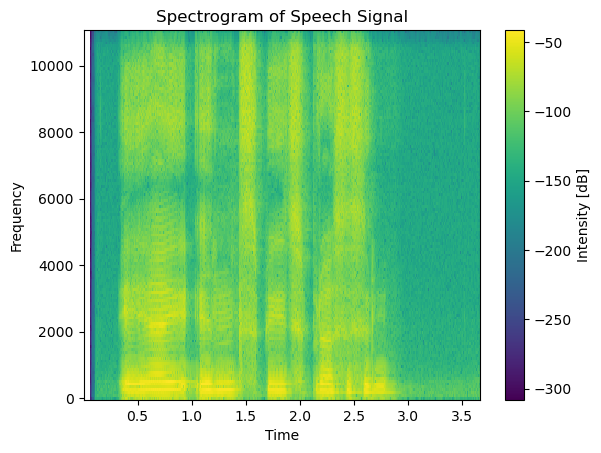

In [33]:
from scipy.signal import spectrogram

librosa.display.waveshow(y)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()